Hi Professor, I done the homework by code to finish the calculate. If there are something unclear, please tell me. Thanks. 

One more thing, there are something wrong with the picture in the jupyter notebook. It can't be shown at the perfect location. So, I just put it at the top. Thanks for you understanding.

In [1]:
def createDataSet():
    dataSet = [[600, 'yes', 'yes'],
               [400, 'no', 'yes'],
               [500, 'no', 'yes'],
               [1000, 'yes', 'no'],
               [700, 'no', 'no'],
               [1200, 'yes', 'no'],
               [800, 'yes', 'yes'],
               [600, 'no', 'yes']]
    labels = ['Rent','Clean']
    return dataSet, labels

In [2]:
trainData,labels=createDataSet()
trainData

[[600, 'yes', 'yes'],
 [400, 'no', 'yes'],
 [500, 'no', 'yes'],
 [1000, 'yes', 'no'],
 [700, 'no', 'no'],
 [1200, 'yes', 'no'],
 [800, 'yes', 'yes'],
 [600, 'no', 'yes']]

In [3]:
from math import log

In [4]:
# calculate the entyopy，了解信息的混乱程度，为选择划分标准做准备
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    #creat dict for all poaaible classifier
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0 # initial value 0
        labelCounts[currentLabel] += 1# count how many currentLabels
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries # use dict[key] to access ditc
        #cal log
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [5]:
calcShannonEnt(trainData)

0.9544340029249649

In [6]:
# To calculate different feature of the dataset, we need to split the dataset first
# axis is the feature we will split(chop)，value is what we want to split(get)
def splitDataSet_str(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def splitDataSet_int(dataSet, axis, value):
    retDataSet_S = []
    retDataSet_L = []
    for featVec in dataSet:
        if featVec[axis] <= value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet_S.append(reducedFeatVec)
        if featVec[axis] > value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet_L.append(reducedFeatVec)
    return retDataSet_S, retDataSet_L

In [7]:
# choose the best feature to split
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]# create a list of all the examples of this feature
        uniqueVals = set(featList)       # get a set of unique values
        print(uniqueVals)
        newEntropy = 0.0
        for value in uniqueVals:
            if type(value)==str:
                subDataSet = splitDataSet_str(dataSet, i, value)
                prob = len(subDataSet)/float(len(dataSet))
                lineEntropy = prob * calcShannonEnt(subDataSet)
                newEntropy += lineEntropy
#                 print('the entropy of ', value, ' is', lineEntropy)
                infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
                print('The IG of label ', i,' is', infoGain)
            else:
                subDataSet1, subDataSet2 = splitDataSet_int(dataSet, i, value)
                prob1 = len(subDataSet1)/float(len(dataSet))
                prob2 = len(subDataSet2)/float(len(dataSet))
                lineEntropy_S = prob1 * calcShannonEnt(subDataSet1)
                lineEntropy_L = prob2 * calcShannonEnt(subDataSet2)
                lineEntropy = lineEntropy_S+lineEntropy_L
#                 print('the entropy of ', value, ' is', lineEntropy)
                infoGain = baseEntropy - lineEntropy     #calculate the info gain; ie reduction in entropy
                print('the IG of ', value, ' is', infoGain)

#         if (infoGain > bestInfoGain):       #compare this to the best gain so far
#             bestInfoGain = infoGain         #if better than current best, set to best
#             bestFeature = value
#     return bestFeature                      #returns an integer

In [8]:
chooseBestFeatureToSplit(trainData)

{800, 1000, 400, 1200, 500, 600, 700}
the IG of  800  is 0.46691718668869936
the IG of  1000  is 0.19920350542916276
the IG of  400  is 0.09235938389499476
the IG of  1200  is 0.0
the IG of  500  is 0.20443400292496494
the IG of  600  is 0.5487949406953985
the IG of  700  is 0.15886800584992988
{'no', 'yes'}
The IG of label  1  is 0.5487949406953985
The IG of label  1  is 0.04879494069539847


The IG of label 1 is the last valuse. So, from the IG we calculated above, the biggest IG is IG(600). So the top of our tree is whether the rent bigger than (700+600)/2=650. Why we use the mean is we need the value bigger than 600 and smaller than the next value.  
Then the left of the tree is all the sastified. So we finished the classification of left tree.  
Then we should drop the data of the left tree and then calculate the IG of the right tree.

In [9]:
trainData_2 = []
for value in trainData:
    if value[0]>650:
        trainData_2.append(value)
trainData_2

[[1000, 'yes', 'no'],
 [700, 'no', 'no'],
 [1200, 'yes', 'no'],
 [800, 'yes', 'yes']]

In [10]:
chooseBestFeatureToSplit(trainData_2)

{1000, 800, 700, 1200}
the IG of  1000  is 0.12255624891826566
the IG of  800  is 0.31127812445913283
the IG of  700  is 0.12255624891826566
the IG of  1200  is 0.0
{'no', 'yes'}
The IG of label  1  is 0.8112781244591328
The IG of label  1  is 0.12255624891826566


The IG of label 1 is the last valuse. So, from the IG we calculated above, the biggest IG is IG(800). So the first node of our right tree is whether the rent bigger than (800+1000)/2=900.  
Then the right of the right tree is all unsastified. So we finished the classification of the right of the right tree.  
Then we should drop the data of the right of the right tree and then calculate the IG of the data left.

In [11]:
trainData_3 = []
for value in trainData_2:
    if value[0]<900:
        trainData_3.append(value)
trainData_3

[[700, 'no', 'no'], [800, 'yes', 'yes']]

In [12]:
chooseBestFeatureToSplit(trainData_3)

{800, 700}
the IG of  800  is 0.0
the IG of  700  is 1.0
{'no', 'yes'}
The IG of label  1  is 1.0
The IG of label  1  is 1.0


From the IG above, we could know that we could either use the label of 'clean' or whether the rent is greater than 750. However, as a human, I know if the room is clean, we should be more sastified than not clean. So, I prefer to choose that when the rent is bigger than 650 and smaller than 900. When the room is clean, we will be satisfied. But if the room is not clean, we will be unsatisfied. So, my tree will be:

In [ ]:
# ![jupyter](./Decision_Tree.jpg)

So, the result of the predict should be:

In [13]:
def createTestSet():
    dataSet = [[550, 'no', 'yes'],
               [750, 'yes', 'yes'],
               [850, 'no', 'no'],
               [1000, 'yes', 'yes']]
    return dataSet

In [14]:
testData=createTestSet()
testData

[[550, 'no', 'yes'],
 [750, 'yes', 'yes'],
 [850, 'no', 'no'],
 [1000, 'yes', 'yes']]

In [15]:
result = ['yes', 'yes', 'no', 'no']

In [16]:
for i in range(0,4):
    print('The predict result of ', testData[i], 'is ', result[i])

The predict result of  [550, 'no', 'yes'] is  yes
The predict result of  [750, 'yes', 'yes'] is  yes
The predict result of  [850, 'no', 'no'] is  no
The predict result of  [1000, 'yes', 'yes'] is  no


So the presion of the prediction is 100% and the recall of the prediction is 50%.(The true position is predicted and true is 'no')

The confusion matrix is shown as belowL

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[1,0], 
        [1,2]]
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Then we use the code to see whether it's the same with the algorithm.

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_giniIndex = DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [19]:
X_train = []
for X in trainData:
    X_train.append(X[:2])
X_train

[[600, 'yes'],
 [400, 'no'],
 [500, 'no'],
 [1000, 'yes'],
 [700, 'no'],
 [1200, 'yes'],
 [800, 'yes'],
 [600, 'no']]

In [20]:
y_train = []
for y in trainData:
    y_train.append(y[2:])
y_train

[['yes'], ['yes'], ['yes'], ['no'], ['no'], ['no'], ['yes'], ['yes']]

In [21]:
for x in X_train:
    if x[1]=='yes':
        x[1] = 1
    else:
        x[1] = 0
X_train

[[600, 1],
 [400, 0],
 [500, 0],
 [1000, 1],
 [700, 0],
 [1200, 1],
 [800, 1],
 [600, 0]]

In [22]:
for y in y_train:
    if y[0]=='yes':
        y[0]=1
    else:
        y[0]=0
y_train

[[1], [1], [1], [0], [0], [0], [1], [1]]

In [23]:
tree_giniIndex.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

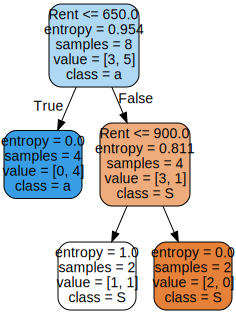

In [24]:
from sklearn import tree
import graphviz

%matplotlib inline

dot_data = tree.export_graphviz(tree_giniIndex, out_file = None,
                              feature_names = labels,
                              class_names = 'Satisfied',
                              filled = True,
                              rounded = True)
graph = graphviz.Source(dot_data)
graph

By now, we could say it's exactly same with my tree. Now I am satisfied.  


In [25]:
X_test = []
for X in testData:
    X_test.append(X[:2])
X_test

[[550, 'no'], [750, 'yes'], [850, 'no'], [1000, 'yes']]

In [26]:
y_test = []
for y in testData:
    y_test.append(y[2:])
y_test

[['yes'], ['yes'], ['no'], ['yes']]

In [27]:
for x in X_test:
    if x[1]=='yes':
        x[1] = 1
    else:
        x[1] = 0
X_test

[[550, 0], [750, 1], [850, 0], [1000, 1]]

In [28]:
for y in y_test:
    if y[0]=='yes':
        y[0]=1
    else:
        y[0]=0
y_test

[[1], [1], [0], [1]]

In [29]:
y_true = []
for y in y_test:
    y_true.append(y[0])
y_true

[1, 1, 0, 1]

In [30]:
y_predicted = tree_giniIndex.predict(X_test)
y_predicted

array([1, 0, 0, 0])

In [31]:
from sklearn import metrics

print(metrics.classification_report(y_predicted, y_true))

             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.33      1.00      0.50         1

avg / total       0.83      0.50      0.50         4



From the report above we could know the precision and the recall of the prediction is not same with my tree. I am not sure what's going on.

Text(91.68,0.5,'predict lable')

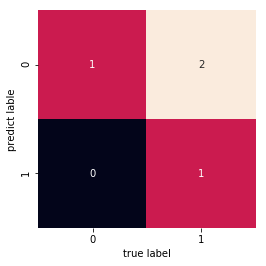

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_true, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predict lable')

From the confusion matrix, we could see the same result is different from the report above.

## 2. Naive Bayes : ##

At first, same with decision tree, we build our own model first:

In [33]:
X_rentTrain = []
for X in trainData:
    X_rentTrain.append(X[:1])
X_rentTrain

[[600], [400], [500], [1000], [700], [1200], [800], [600]]

In [34]:
import numpy as np

X_rentTrainLike = []
X_rentTrainUnlike = []
for x in trainData:
    if x[2]=='yes':
        X_rentTrainLike.append(x[0])
    else:
        X_rentTrainUnlike.append(x[0])

mean_Like = np.mean(X_rentTrainLike)
std_Like = np.std(X_rentTrainLike)
mean_unLike = np.mean(X_rentTrainUnlike)
std_unLike = np.std(X_rentTrainUnlike)

print('The mean of (Rent | like) is ', mean_Like)
print('The std of (Rent | like) is ', std_Like)
print('The mean of (Rent | dislike) is ', mean_unLike)
print('The std of (Rent | dislike) is ', std_unLike)

The mean of (Rent | like) is  580.0
The std of (Rent | like) is  132.664991614216
The mean of (Rent | dislike) is  966.6666666666666
The std of (Rent | dislike) is  205.48046676563254


In [35]:
import math
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [36]:
for value in testData:
    P_like = normpdf(value[0], mean_Like, std_Like)
    P_dislike = normpdf(value[0], mean_unLike, std_unLike)
    print(value)
    print('P(Rent | like) is', P_like)
    print('P(Rent | dislike) is', P_dislike)
    print('P(like | Rent) is', P_like*5/8)
    print('P(dislike | Rent) is', P_dislike*3/8)
    if P_like*5/8>P_dislike*3/8:
        print(value, "Yes")
    else:
        print(value, "No")

[550, 'no', 'yes']
P(Rent | like) is 0.0029312280750170548
P(Rent | dislike) is 0.00024846450416328994
P(like | Rent) is 0.0018320175468856592
P(dislike | Rent) is 9.317418906123372e-05
[550, 'no', 'yes'] Yes
[750, 'yes', 'yes']
P(Rent | like) is 0.0013230860545007733
P(Rent | dislike) is 0.001113540652675583
P(like | Rent) is 0.0008269287840629833
P(dislike | Rent) is 0.0004175777447533436
[750, 'yes', 'yes'] Yes
[850, 'no', 'no']
P(Rent | like) is 0.0003790705012732947
P(Rent | dislike) is 0.0016524872184977863
P(like | Rent) is 0.00023691906329580917
P(dislike | Rent) is 0.0006196827069366699
[850, 'no', 'no'] No
[1000, 'yes', 'yes']
P(Rent | like) is 2.0033007694342812e-05
P(Rent | dislike) is 0.0019161306647508657
P(like | Rent) is 1.2520629808964257e-05
P(dislike | Rent) is 0.0007185489992815746
[1000, 'yes', 'yes'] No


From the result above, we could know that the result is same with my tree result.  

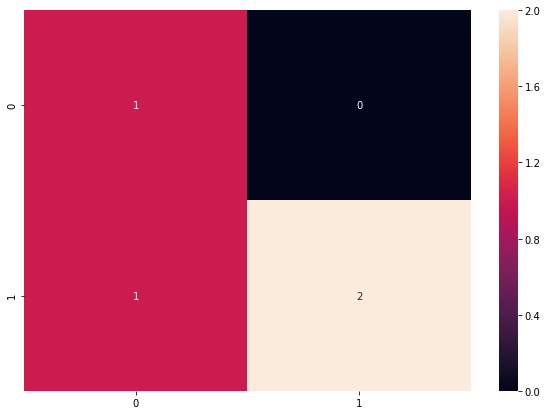

In [37]:
array = [[1,0], 
        [1,2]]
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Then let us see the performance of the algorithorm.

In [38]:
X_rentTest = []
for X in testData:
    X_rentTest.append(X[:1])
X_rentTest

[[550], [750], [850], [1000]]

In [39]:
from sklearn.naive_bayes import GaussianNB

gaussian_model = GaussianNB()
gaussian_model.fit(X_rentTrain, y_train)
y_predictedNB = gaussian_model.predict(X_rentTest)
print(metrics.classification_report(y_predictedNB, y_true))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       0.67      1.00      0.80         2

avg / total       0.83      0.75      0.73         4



/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(91.68,0.5,'true lable')

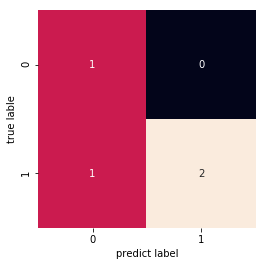

In [40]:
matRent = confusion_matrix(y_predictedNB, y_true)
sns.heatmap(matRent.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predict label')
plt.ylabel('true lable')

From the confusion matrix we could know the algorithm result is not same with my predict result. And different from the decision tree. I think I need to double check what's going wrong with the tree algorithorm code.

From the report and the confusion metris above we could know the precision of not Satisfied and the recall of Satisfied is 1. But the other two metrics are not good. So, in this decision tree, if the predict result is 0 we could believe that the person will be unsatisfied. But, if the predict result is 1, then there are wtil 25% probility that the person will be unsatisfied.

I found what's interesting is for the Naive Bayes model, even though we just use the rent to predict, the result is better than decision tree. So, for this situation, the Naive Bayes model is better than decision tree model.

## 3. Classification Models ##

I think the biggest difference between a generative model and a discriminative model is:  
For discriminative model, when you get the P(y|x), you just need to know whether it's bigger or smaller than a threshold and then you can make a decision.  
But for a generative model, you need to compare with all the P(x, y) and then choose the biggest feature as the predicted feature.

reference:  
https://stackoverflow.com/questions/879432/what-is-the-difference-between-a-generative-and-a-discriminative-algorithm